In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
df = pd.read_csv('./dataset.csv')
df.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCE,TD,TM,TG,PID,PF,PERS,AP,APO,classification
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,...,13.35,0.0,0.00,0.91,0.67,3.36,1.82,0.00,0.0,C
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,...,21.60,0.0,0.00,0.00,1.09,1.82,1.82,0.00,0.0,C
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.00,0.0,0.00,1.68,0.00,0.00,3.36,3.28,0.0,A
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16.25,0.0,3.36,0.00,0.36,0.00,0.00,1.82,0.0,A
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,14.80,0.0,0.00,0.00,3.82,8.85,4.76,0.00,0.0,B


In [14]:
X = df.drop(columns=['classification'])
X.head()

,IS,I,IJ,ED,EM,JI,EP,IVD,IVM,IVP,...,CCO,CCE,TD,TM,TG,PID,PF,PERS,AP,APO
0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,11.0,6.0,...,1.68,13.35,0.0,0.00,0.91,0.67,3.36,1.82,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0,...,0.00,21.60,0.0,0.00,0.00,1.09,1.82,1.82,0.00,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,...,3.94,0.00,0.0,0.00,1.68,0.00,0.00,3.36,3.28,0.0
3,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.68,16.25,0.0,3.36,0.00,0.36,0.00,0.00,1.82,0.0
4,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,3.0,...,3.51,14.80,0.0,0.00,0.00,3.82,8.85,4.76,0.00,0.0


In [15]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [16]:
pred = kmeans.predict(X)
out_df = pd.DataFrame({'label': pred})
out_df.head()

,label
0,0
1,2
2,0
3,0
4,0


In [17]:
out_df['label'].value_counts()

0    1952
2    1228
1     800
4     632
3     586
Name: label, dtype: int64

In [18]:
label_0 = out_df[out_df['label'] == 0]
label_0.index
df[df.index.isin(label_0.index)]['classification'].value_counts()

C             1050
reconocido     400
B              303
A              172
A1              27
Name: classification, dtype: int64

In [19]:
label_1 = out_df[out_df['label'] == 1]
label_1.index
df[df.index.isin(label_1.index)]['classification'].value_counts()

B             277
C             254
A             194
reconocido     41
A1             34
Name: classification, dtype: int64

In [20]:
label_2 = out_df[out_df['label'] == 2]
label_2.index
df[df.index.isin(label_2.index)]['classification'].value_counts()

C             588
B             279
A             180
reconocido    154
A1             27
Name: classification, dtype: int64

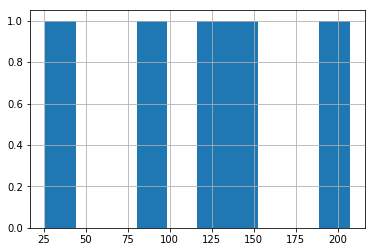

In [21]:
label_3 = out_df[out_df['label'] == 3]
label_3.index
df_label_3 = df[df.index.isin(label_3.index)]['classification'].value_counts()
df_label_3.hist()

In [22]:
label_4 = out_df[out_df['label'] == 4]
label_4.index
df_label_4 = df[df.index.isin(label_4.index)]['classification'].value_counts()
df_label_4.head()

A1            354
B             101
A              84
C              77
reconocido     16
Name: classification, dtype: int64

In [23]:
from sklearn.manifold import TSNE

In [24]:
model = TSNE(learning_rate=100)

In [25]:
transformed = model.fit_transform(X)

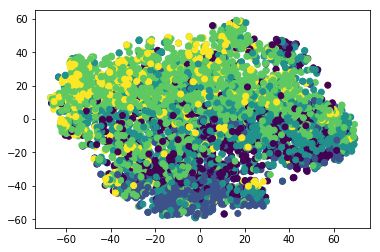

In [32]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
df['classification'] = df['classification'].astype('category')
df['classification'] = df['classification'].cat.codes
plt.scatter(x_axis, y_axis, c=df['classification'])
plt.show()